# Train random forest and predict test set

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import functions

import importlib as imp
imp.reload(functions);

In [16]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
feature_names = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']

In [17]:
X, y = functions.preprocess_dataset(train)

In [18]:
clf = RandomForestClassifier(random_state=42,
                             n_estimators=100,
                             criterion='gini',
                             max_features='sqrt',
                             min_samples_leaf=5
                            )

In [19]:
def evaluate_model(classifier, X, y, feature_names, plot_feature_importance=True):
    
    cv_scores = cross_val_score(classifier, X, y, cv=5)
    print('cv-fold recognition rates: {}'.format(cv_scores))
    mean_score = np.mean(cv_scores)
    print('mean recognition rate (best estimate): {:.2f}'.format(mean_score))
    
    if plot_feature_importance:
        classifier.fit(X, y)
        x_pos = np.arange(len(feature_names))
        plt.bar(x_pos, classifier.feature_importances_)
        plt.xticks(x_pos, feature_names)
        plt.ylabel('importance')
        plt.title('Feature importance')
        plt.show()

cv-fold recognition rates: [0.78212291 0.81005587 0.8258427  0.79775281 0.83050847]
mean recognition rate (best estimate): 0.81


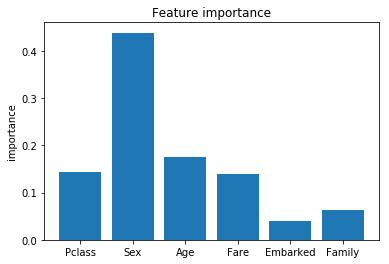

In [20]:
evaluate_model(clf, X, y, feature_names)

cv-fold recognition rates: [0.75977654 0.81005587 0.83707865 0.80898876 0.84745763]
mean recognition rate (best estimate): 0.81


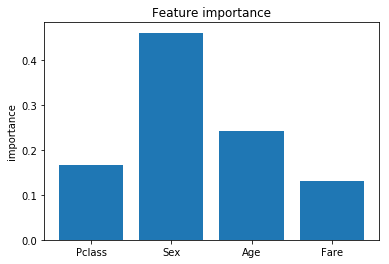

In [21]:
evaluate_model(clf, X[:,:4], y, feature_names[:4])

cv-fold recognition rates: [0.74860335 0.79329609 0.78651685 0.75280899 0.78531073]
mean recognition rate (best estimate): 0.77


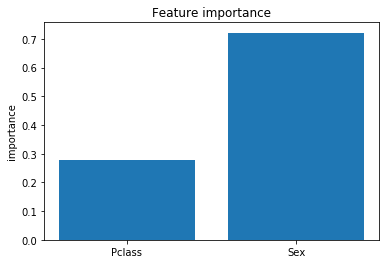

In [22]:
evaluate_model(clf, X[:,:2], y, feature_names[:2])

In [23]:
X_test = functions.preprocess_dataset(test, test_set=True)

# only use 4 features: 'Pclass', 'Sex', 'Age', 'Fare'
clf.fit(X[:,:4], y)
y_pred = clf.predict(X_test[:,:4])
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [24]:
pd.Series(y_pred, index=test.PassengerId, name='Survived').to_csv('../results/prediction_rf.csv', header=True)